In [127]:
import numpy as ny
import pandas as ps
import matplotlib.pyplot as ml
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind
from subprocess import check_output
from scipy.stats import zscore
from scipy.stats import ttest_rel
from statsmodels.stats import weightstats
import statsmodels.api as sa
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [104]:
DF=ps.read_csv(r"C:\Users\ShinChan\Downloads\cereal.csv")

In [105]:
DF.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [6]:
DF.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


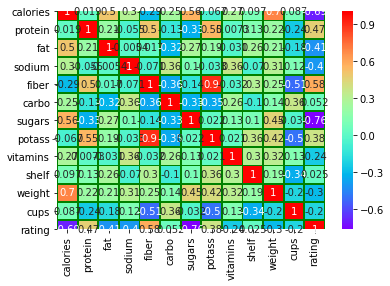

In [11]:
sb.heatmap(DF.corr(),annot=True,linecolor="g",cmap="rainbow",linewidths=0.9)

In [21]:
cd=DF.loc[DF["type"]=="C",:]
ht=DF.loc[DF["type"]=="H",:]

In [23]:
DF[DF["type"]=="C"]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [24]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [29]:
DF.columns.nunique()

16

In [37]:
DF.mfr.value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

In [63]:
ttest_ind(ht["sugars"],cd["sugars"],equal_var=False)

Ttest_indResult(statistic=-4.994846451755555, pvalue=0.01874372013190692)

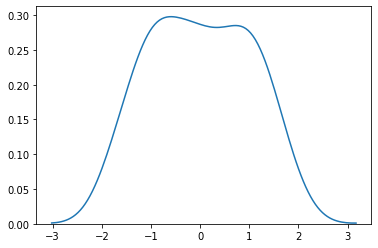

In [48]:
sb.kdeplot(zscore(cd["sugars"]))

In [49]:
cc=DF[DF["type"]=="C"]
hc=DF[DF["type"]=="H"]

In [61]:
ttest_ind(cc["calories"],hc['calories'],equal_var=False)

Ttest_indResult(statistic=3.1070612896033047, pvalue=0.002691710812554955)

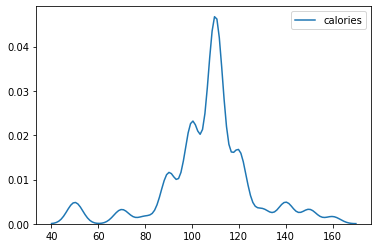

In [53]:
sb.kdeplot(cc["calories"])

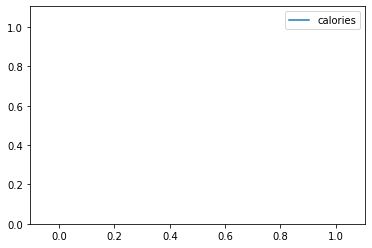

In [55]:
sb.kdeplot(hc["calories"])

In [56]:
hc["calories"]

20    100
43    100
57    100
Name: calories, dtype: int64

In [57]:
cc["calories"]

0      70
1     120
2      70
3      50
4     110
     ... 
72    110
73    110
74    100
75    100
76    110
Name: calories, Length: 74, dtype: int64

In [59]:
ttest_ind(cc["calories"],cc["calories"],equal_var=False)

Ttest_indResult(statistic=0.0, pvalue=1.0)

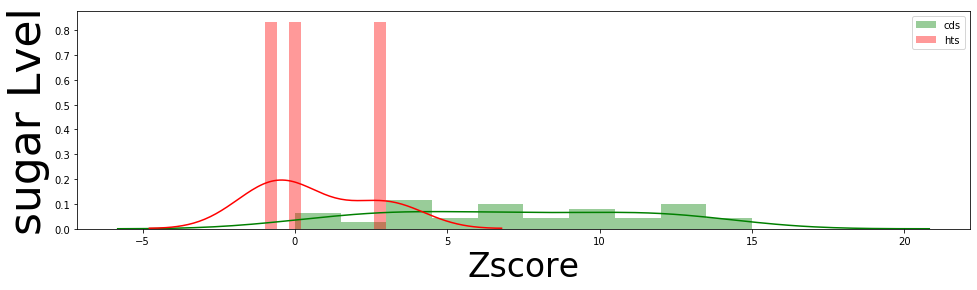

In [73]:
ml.figure(figsize=(16,4))
sb.distplot(cd["sugars"],bins=10,color="g",label="cds")
sb.distplot(ht["sugars"],bins=10,label="hts",color="r")
ml.legend()
ml.xlabel("Zscore",size=33)
ml.ylabel("sugar Lvel",size=44)
ml.show()

In [75]:
df=ps.read_csv(r"C:\Users\ShinChan\Downloads\hypothesis_testing.csv")

In [76]:
df.tail()

,Current,New
35,267,263
36,279,261
37,274,255
38,276,263
39,262,279


In [77]:
df.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


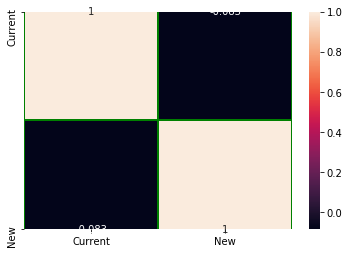

In [78]:
sb.heatmap(df.corr(),annot=True,linecolor="g",linewidths=0.9)

In [80]:
ttest_ind(df["Current"],df["New"],equal_var=False)

Ttest_indResult(statistic=1.3283615935245678, pvalue=0.18798994530489838)

T-paired 

In [83]:
from scipy.stats import ttest_rel

In [84]:
ttest_rel(df.Current,df.New)

Ttest_relResult(statistic=1.2769699827911767, pvalue=0.20916361823147053)

##### Z-test mean=2

In [85]:
from statsmodels.stats import weightstats

In [94]:
z,p=weightstats.ztest(df.Current,df.New)

In [95]:
print(z,p)

1.3283615935245678 0.18405868087594723


z-Test 1

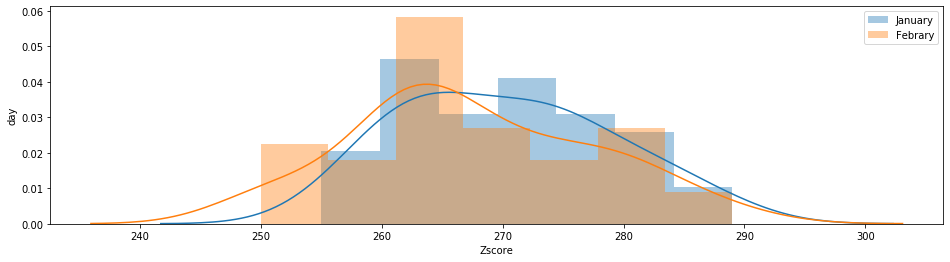

In [108]:
ml.figure(figsize=(16,4))
sb.distplot(df.Current,bins=7,label="January")
sb.distplot(df.New,bins=7,label="Febrary")
ml.xlabel("Zscore")
ml.legend()
ml.ylabel("day")
ml.show()

# ANOVA

In [3]:
DS=ps.read_csv(r"C:\Users\ShinChan\Downloads/PlantGrowth.csv")

In [8]:
DS.tail()

,Unnamed: 0,weight,group
25,26,5.29,trt2
26,27,4.92,trt2
27,28,6.15,trt2
28,29,5.80,trt2
29,30,5.26,trt2


In [20]:
un=DS.group.unique()

In [21]:
dd={i : DS[DS["group"]==i]["weight"] for i in un}

In [22]:
dd

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64, 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64, 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [27]:
dc={i:len(DS[DS["group"]==i]) for i in un}

In [42]:
DS.groupby("group").size()[0]

10

<Figure size 1152x288 with 0 Axes>

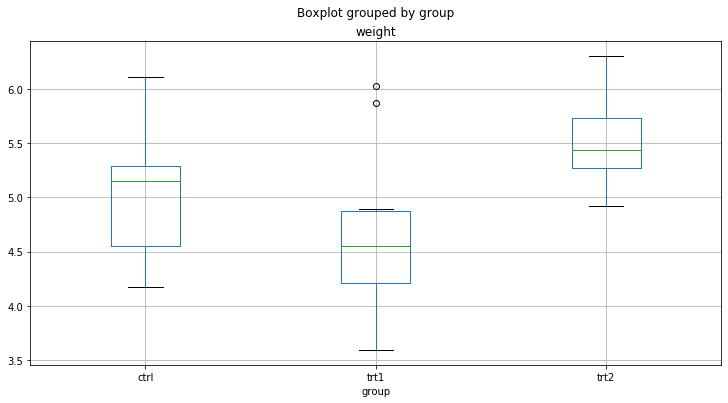

In [53]:
ml.figure(figsize=(16,4))
DS.boxplot("weight" , by="group",figsize=(12,6))

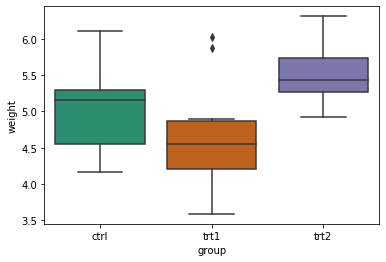

In [67]:
sb.boxplot(y=DS.weight,x=DS.group,palette="Dark2")

In [131]:
MM=ols("weight ~ group",data=DS).fit()

In [81]:
anova=sa.stats.anova_lm(MM)

In [82]:
anova

,df,sum_sq,mean_sq,F,PR(>F)
group,2.0,3.76634,1.883170,4.846088,0.01591
Residual,27.0,10.49209,0.388596,NaN,NaN


In [107]:
DF.head(2)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679


In [122]:
fo=ols("fiber~fat",DF).fit()

In [123]:
sa.stats.anova_lm(fo)

,df,sum_sq,mean_sq,F,PR(>F)
fat,1.0,0.120678,0.120678,0.020971,0.885247
Residual,75.0,431.591530,5.754554,NaN,NaN


## Tukey Test

In [134]:
MC=MultiComparison(DS["weight"],DS["group"])
print(MC.tukeyhsd())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3921 -1.0621 0.3201  False
  ctrl   trt2    0.494  0.198 -0.1971 1.1851  False
  trt1   trt2    0.865  0.012  0.1739 1.5561   True
---------------------------------------------------


In [161]:
mc=MultiComparison(DF[["fat"]],DF["mfr"])

In [162]:
print(mc.tukeyhsd())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      G   0.3636    0.9 -2.5407 3.2679  False
     A      K  -0.3913    0.9 -3.2929 2.5103  False
     A      N  -0.8333    0.9 -3.9014 2.2347  False
     A      P  -0.1111    0.9 -3.1052  2.883  False
     A      Q     0.75    0.9 -2.2628 3.7628  False
     A      R     0.25    0.9 -2.7628 3.2628  False
     G      K  -0.7549 0.1123  -1.602 0.0921  False
     G      N   -1.197 0.0948 -2.5052 0.1113  False
     G      P  -0.4747 0.8428 -1.5987 0.6492  False
     G      Q   0.3864    0.9 -0.7864 1.5591  False
     G      R  -0.1136    0.9 -1.2864 1.0591  False
     K      N   -0.442    0.9 -1.7441 0.8601  False
     K      P   0.2802    0.9 -0.8366  1.397  False
     K      Q   1.1413  0.059 -0.0246 2.3072  False
     K      R   0.6413 0.6203 -0.5246 1.8072  False
     N      P   0.7222 0.7382 -0.7748 2.2193  False
     N      

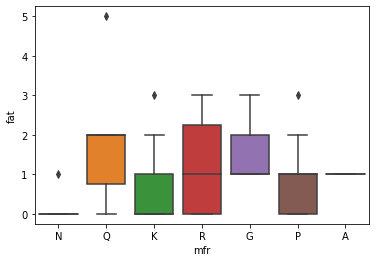

In [151]:
sb.boxplot(y=DF["fat"],x=DF.mfr)